# **#前処理**

In [1]:
import pandas as pd

# 学習用データとテストデータを読み込みます
train_data = pd.read_csv('/home-asustor/teramoto/SIGNATE/EX/Fuel_efficiency/data/train.tsv', sep='\t')
test_data = pd.read_csv('/home-asustor/teramoto/SIGNATE/EX/Fuel_efficiency/data/train.tsv', sep='\t')

# 学習用データの最初の数行を表示します
print("学習用データ:")
print(train_data.head())

# 学習用データの概要統計量を表示します
print("\n学習用データの概要:")
print(train_data.describe())

# 学習用データに欠損値があるかを確認します
print("\n学習用データの欠損値:")
print(train_data.isnull().sum())

# テストデータの最初の数行を表示します
print("\nテストデータ:")
print(test_data.head())

# テストデータの欠損値を確認します
print("\nテストデータの欠損値:")
print(test_data.isnull().sum())


学習用データ:
   Unnamed: 0   mpg  cylinders  displacement horsepower  weight  acceleration  \
0           0  39.4          4          85.0         70    2070          18.6   
1           3  18.0          6         171.0         97    2984          14.5   
2           9  32.7          6         168.0        132    2910          11.4   
3          11  38.1          4          89.0         60    1968          18.8   
4          13  28.0          4          98.0         80    2164          15.0   

   model year  origin               car name  
0          78       3         datsun b210 gx  
1          75       1             ford pinto  
2          80       3          datsun 280-zx  
3          80       3  toyota corolla tercel  
4          72       1        dodge colt (sw)  

学習用データの概要:
       Unnamed: 0         mpg   cylinders  displacement       weight  \
count  199.000000  199.000000  199.000000    199.000000   199.000000   
mean   200.170854   22.997990    5.527638    200.889447  3063.32663

In [2]:
import pandas as pd
import numpy as np

# データの読み込み
train_data = pd.read_csv('/home-asustor/teramoto/SIGNATE/EX/Fuel_efficiency/data/train.tsv', sep='\t')
test_data = pd.read_csv('/home-asustor/teramoto/SIGNATE/EX/Fuel_efficiency/data/test.tsv', sep='\t')

# horsepower列の欠損値処理: '?'をNaNに置き換え、その後数値型に変換します
train_data['horsepower'].replace('?', np.nan, inplace=True)
train_data['horsepower'] = train_data['horsepower'].astype(float)
test_data['horsepower'].replace('?', np.nan, inplace=True)
test_data['horsepower'] = test_data['horsepower'].astype(float)

# 欠損値を列の平均値で補完します
train_data['horsepower'].fillna(train_data['horsepower'].mean(), inplace=True)
test_data['horsepower'].fillna(test_data['horsepower'].mean(), inplace=True)

# カテゴリカルデータのエンコーディング (One-Hot Encoding)
train_data = pd.get_dummies(train_data, columns=['origin'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['origin'], drop_first=True)

# 不要なカラムを削除します
train_data.drop(['Unnamed: 0', 'car name'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0', 'car name'], axis=1, inplace=True)

# 前処理結果を確認します
print("前処理後の学習データ:")
print(train_data.head())

print("\n前処理後のテストデータ:")
print(test_data.head())


前処理後の学習データ:
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  39.4          4          85.0        70.0    2070          18.6   
1  18.0          6         171.0        97.0    2984          14.5   
2  32.7          6         168.0       132.0    2910          11.4   
3  38.1          4          89.0        60.0    1968          18.8   
4  28.0          4          98.0        80.0    2164          15.0   

   model year  origin_2  origin_3  
0          78     False      True  
1          75     False     False  
2          80     False      True  
3          80     False      True  
4          72     False     False  

前処理後のテストデータ:
   cylinders  displacement  horsepower  weight  acceleration  model year  \
0          8         350.0       180.0    4499          12.5          73   
1          4         156.0       105.0    2745          16.7          78   
2          6         156.0       108.0    2930          15.5          76   
3          4         108.0       

# **#モデルの構築**

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# 特徴量とターゲットを定義
X = train_data.drop('mpg', axis=1)  # 特徴量
y = train_data['mpg']               # 予測対象（燃料消費量）

# 訓練データと検証データに分割
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# ラッソ回帰のハイパーパラメータチューニング
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

model = Lasso()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                                 cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

grid_search.fit(X_train, y_train)

# 最良モデルで予測と評価
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_valid)
mae = mean_absolute_error(y_valid, y_pred)
print(f'ラッソ回帰 - 検証データでのMAE: {mae}')


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ...........................................alpha=10; total time=   0.0s
[CV] END ...........................................alpha=10; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ...........................................alpha=10; total time=   0.0s
[CV] END ...........................................alpha=10; total time=   0.0s
[CV] END ..........................................alpha=100; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ..........................................alpha=100; total time=   0.0s
[CV] END ..........................................alpha=100; total time=   0.0s
[CV] END ........................................

# **#可視化**

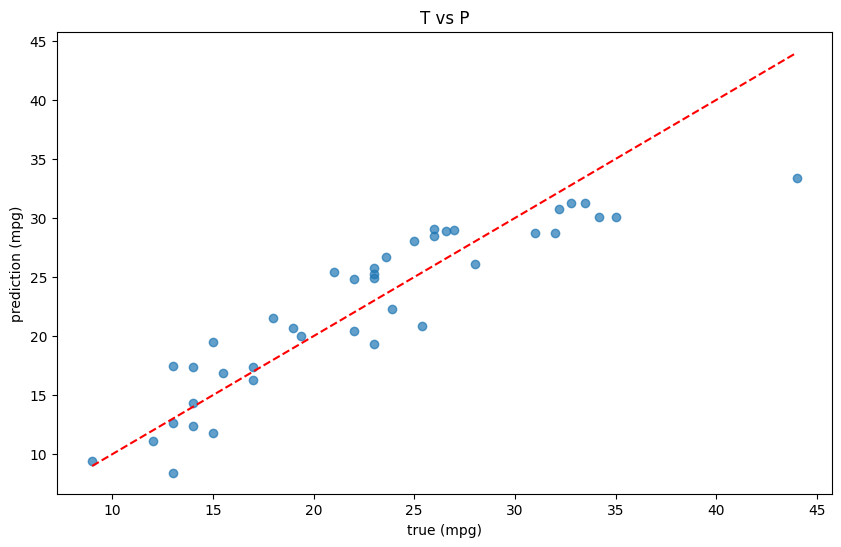

In [ ]:
import matplotlib.pyplot as plt

# 検証データの予測結果 vs 実際の値をプロット
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, y_pred, alpha=0.7)
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], color='red', linestyle='--')  # 完全一致を表すライン
plt.xlabel('true (mpg)')
plt.ylabel('prediction (mpg)')
plt.title('T vs P')
plt.show()


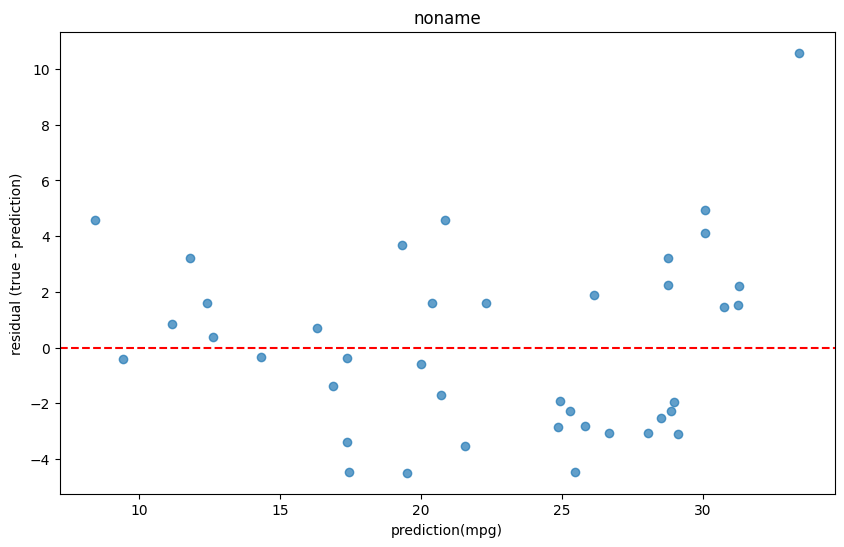

In [ ]:
# 残差プロット
residuals = y_valid - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('prediction(mpg)')
plt.ylabel('residual (true - prediction)')
plt.title('noname')
plt.show()
